# **K-MEANS**

## **Implementacion**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import csv

from mpl_toolkits.mplot3d import axes3d
from random import uniform
from math import sqrt, inf

In [26]:
class KMeans:
  def __init__(self, X, K):
    self.X = X
    self.K = K 
    self.centers = self.random_centers()
  
  def random_centers(self):
    N = len(self.X[0])
    x_min = [min(x[i] for x in self.X) for i in range(N)]
    x_max = [max(x[i] for x in self.X) for i in range(N)]
    centers = np.array([[uniform(x_min[i], x_max[i]) for i in range(N)] for _ in range(self.K)])
    return centers

  def inertia(self):
    return sum(min(np.linalg.norm(x - u)**2 for u in self.centers) for x in self.X)

  def d(self, x, y):
    return np.linalg.norm(x-y)

  def train(self, steps = -1):
    S_i = self.inertia
    S = 0
    while S_i != S and steps != 0:
      steps -= 1
      # Actualizamos la inercia anterior.
      S = S_i

      # Agregamos cada elemento a su cluster correspondiente.
      self.clusters = [[] for _ in range(self.K)]
      for x in X:
        min_d = inf
        center = None
        for i, c in enumerate(self.centers):
          dist = self.d(x, c)
          if dist < min_d:
            min_d = dist
            center = i
        self.clusters[center].append(x)

      # Los nuevos centros seran los centros son promediados.
      for i in range(len(self.clusters)):
        self.centers[i] = sum(x for x in self.clusters[i])/max(1, len(self.clusters[i]))

      # Se calcula la inercia actual.
      S_i = self.inertia()

## **Lectura de Datos**

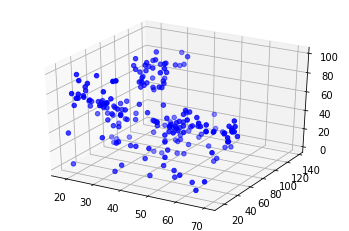

In [27]:
# Leemos los datos y los graficamos.
with open('../../MaterialMML/DataSets/Mall_Customers.csv', newline='') as File:  
    reader = csv.reader(File)
    X, Y = [], []
    prim = True
    for row in reader:
      if not prim:
        X.append(np.array([int(r) for r in row[2:]]))
      else: prim = False

# Creamos la figura
fig = plt.figure()
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')
# Agregamos los puntos en el plano 3D
ax1.scatter([x[0] for x in X], [x[1] for x in X], [x[2] for x in X], c='b', marker='o')

# Mostramos el gráfico
plt.show()

## **Entrenamiento**

In [34]:
K = 4
KM = KMeans(X, K)
KM.train()

## **Resultados**

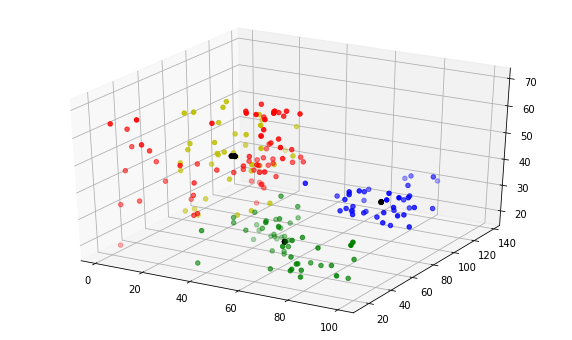

In [35]:
# Creamos la figura
fig = plt.figure(figsize=(10,6))
# Creamos el plano 3D
ax1 = fig.add_subplot(111, projection='3d')

# Agregamos los puntos en el plano 3D
colors = ['r','g','b','y','c','purple']
for i in range(K):
    ax1.scatter([x[2] for x in KM.clusters[i]], 
                [x[1] for x in KM.clusters[i]], 
                [x[0] for x in KM.clusters[i]], c=colors[i], marker='o')

for _ in range(10):
    ax1.scatter([x[2] for x in KM.centers], 
                [x[1] for x in KM.centers], 
                [x[0] for x in KM.centers], c='black', marker='o')
# Mostramos el gráfico
plt.show()

## **Analisis para varios valores de K**

In [36]:
KMs = [KMeans(X, i) for i in range(1, 26)]
for km in KMs: km.train()
I = [km.inertia() for km in KMs]

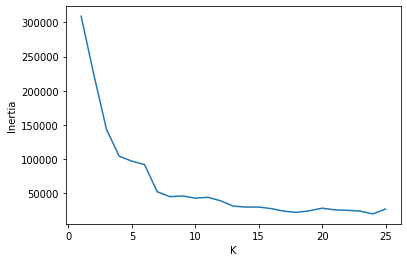

In [37]:
plt.xlabel("K")
plt.ylabel("Inertia")
plt.plot([i for i in range(1, 26)], I)
plt.show()